Ridge Regression
Coefficients: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]
MSE: 0.5558548589435971
R2 score: 0.5758157428913684


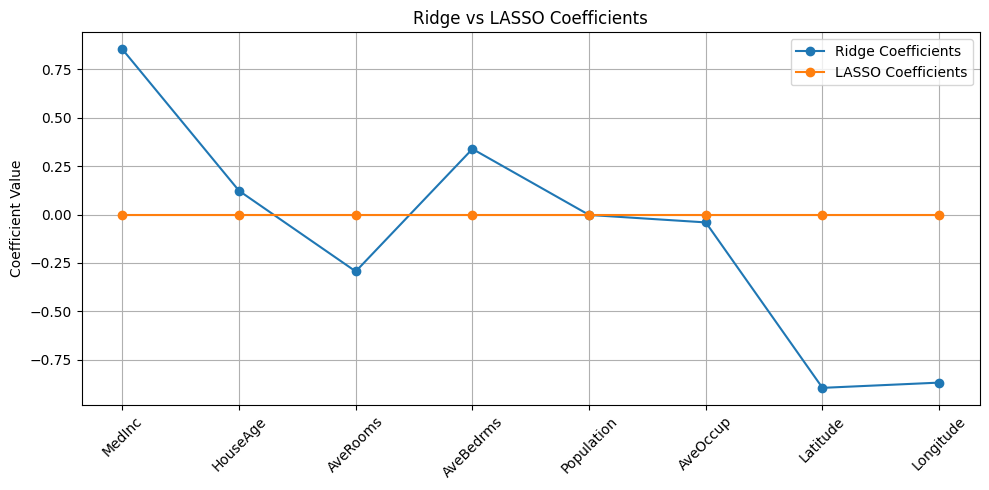

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
housing = fetch_california_housing()
X=pd.DataFrame(housing.data,columns=housing.feature_names)
y=housing.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled,y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("Ridge Regression")
print("Coefficients:",ridge_model.coef_)
print("MSE:",mean_squared_error(y_test,y_pred_ridge))
print("R2 score:",r2_score(y_test,y_pred_ridge))
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled,y_train)
y_pred_lasso=lasso_model.predict(X_test_scaled)

plt.figure(figsize=(10,5))
plt.plot(ridge_model.coef_,label='Ridge Coefficients',marker = 'o')
plt.plot(lasso_model.coef_,label='LASSO Coefficients',marker = 'o')
plt.title('Ridge vs LASSO Coefficients')
plt.xticks(ticks=range(len(X.columns)),labels=X.columns,rotation=45)
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
